# Data Collection

>You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model. In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data.

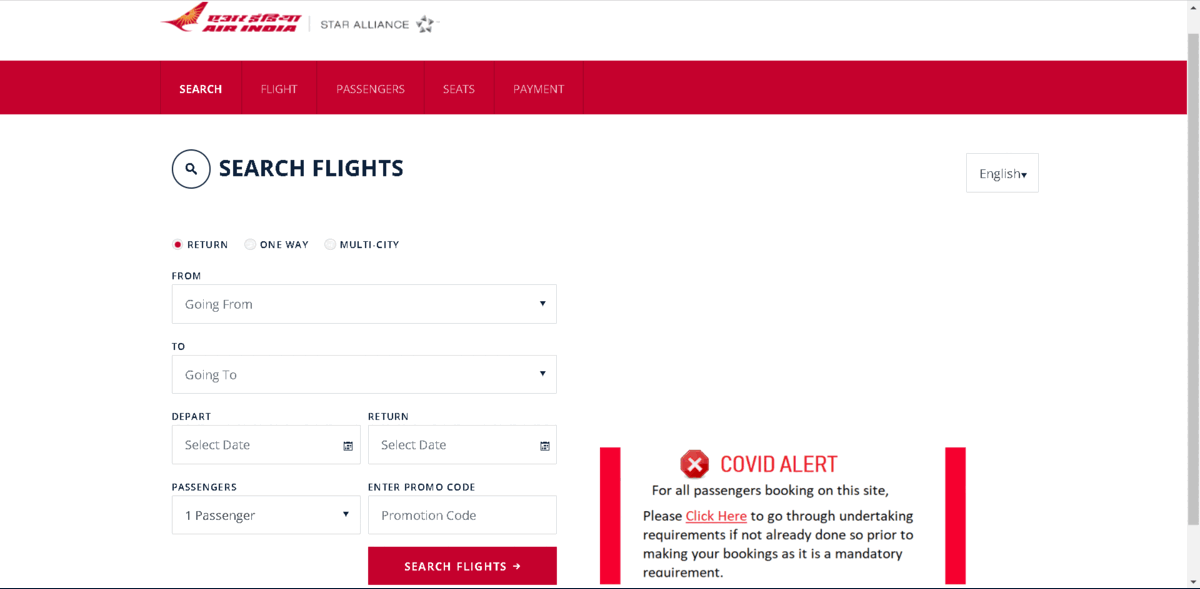

In [ ]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import time, sys
import datetime
import tqdm.notebook as tqdm
import pandas as pd
import numpy as np

import requests
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
from urllib.parse import urljoin
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

Importing all the necessary libraries/dependencies here.

In [ ]:
browser = webdriver.Chrome(r"C:\Users\swrai\Desktop\Flight Price Prediction Project (Flip Robo)\chromedriver.exe")

url = "https://www.expedia.co.in/Flights"

# Setting the ticket types paths
return_ticket = "//label[@id='flight-type-roundtrip-label-hp-flight']"
one_way_ticket = "//label[@id='flight-type-one-way-label-hp-flight']"
multi_ticket = "//label[@id='flight-type-multi-dest-label-hp-flight']"

In [ ]:
def ticket_chooser(ticket):

    try:
        ticket_type = browser.find_element_by_xpath(ticket)
        ticket_type.click()
    except Exception as e:
        pass

In [ ]:
# For departure place name
def dep_place_chooser(dep_place):
    fly_from = browser.find_element_by_xpath("//input[@id='flight-origin-hp-flight']")
    time.sleep(1)
    fly_from.clear()
    time.sleep(1.5)
    fly_from.send_keys('  ' + dep_place)
    time.sleep(1.5)
    first_item = browser.find_element_by_xpath("//a[@id='aria-option-0']")
    time.sleep(1.5)
    first_item.click()

In [ ]:
# For arrival place name
def arr_place_chooser(arr_place):
    fly_to = browser.find_element_by_xpath("//input[@id='flight-destination-hp-flight']")
    time.sleep(1)
    fly_to.clear()
    time.sleep(1.5)
    fly_to.send_keys('  ' + arr_place)
    time.sleep(1.5)
    first_item = browser.find_element_by_xpath("//a[@id='aria-option-0']")
    time.sleep(1.5)
    first_item.click()

In [ ]:
# Departure date
def dep_date_chooser(month, day, year):
    dep_date_button = browser.find_element_by_xpath("//input[@id='flight-departing-hp-flight']")
    dep_date_button.clear()
    dep_date_button.send_keys(month + '/' + day + '/' + year)

In [ ]:
# Return date
def return_date_chooser(month, day, year):
    return_date_button = browser.find_element_by_xpath("//input[@id='flight-returning-hp-flight']")

    for i in range(11):
        return_date_button.send_keys(Keys.BACKSPACE)
    return_date_button.send_keys(month + '/' + day + '/' + year)

In [ ]:
def search():
    search = browser.find_element_by_xpath("//button[@class='btn-primary btn-action gcw-submit']")
    search.click()
    time.sleep(15)
    print('Results ready!')

In [ ]:
df = pd.DataFrame()
def compile_data():
    global df
    global dep_times_list
    global arr_times_list
    global airlines_list
    global price_list
    global durations_list
    global stops_list
    global layovers_list

    #departure times
    dep_times = browser.find_elements_by_xpath("//span[@data-test-id='departure-time']")
    dep_times_list = [value.text for value in dep_times]

    #arrival times
    arr_times = browser.find_elements_by_xpath("//span[@data-test-id='arrival-time']")
    arr_times_list = [value.text for value in arr_times]

    #airline name
    airlines = browser.find_elements_by_xpath("//span[@data-test-id='airline-name']")
    airlines_list = [value.text for value in airlines]

    #prices
    prices = browser.find_elements_by_xpath("//span[@data-test-id='listing-price-dollars']")
    price_list = [value.text.split('/div>)[1] for value in prices]

    #durations
    durations = browser.find_elements_by_xpath("//span[@data-test-id='duration']")
    durations_list = [value.text for value in durations]

    #stops
    stops = browser.find_elements_by_xpath("//span[@class='number-stops']")
    stops_list = [value.text for value in stops]

    #layovers
    layovers = browser.find_elements_by_xpath("//span[@data-test-id='layover-airport-stops']")
    layovers_list = [value.text for value in layovers]

    now = datetime.datetime.now()
    current_date = (str(now.year) + '-' + str(now.month) + '-' + str(now.day))
    current_time = (str(now.hour) + ':' + str(now.minute))
    current_price = 'price' + '(' + current_date + '---' + current_time + ')'
    for i in range(len(dep_times_list)):
        try:
            df.loc[i, 'departure_time'] = dep_times_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, 'arrival_time'] = arr_times_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, 'airline'] = airlines_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, 'duration'] = durations_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, 'stops'] = stops_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, 'layovers'] = layovers_list[i]
        except Exception as e:
            pass
        try:
            df.loc[i, str(current_price)] = price_list[i]
        except Exception as e:
            pass

    print('Comma Separated Value File Created!')

In [ ]:
for i in range(8):    
    browser.get(url)
    time.sleep(5)

    # choose flights only
    flights_only = browser.find_element_by_xpath("//button[@id='tab-flight-tab-hp']")
    flights_only.click()

    ticket_chooser(return_ticket)

    dep_place_chooser('BOM')

    arr_place_chooser('BLR')

    dep_date_chooser('04', '01', '2022')

    return_date_chooser('05', '02', '2022')

    search()

    compile_data()

    print('run {} completed!'.format(i))

    df.to_csv('Flight_Price_Data.csv')

    time.sleep(15)